<a href="https://colab.research.google.com/github/valeriavasquezv/valeriavasquez-portfolio/blob/main/Proyecto_1/AluraStoreLatam_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [101]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



### Cálculo de ingresos de cada tienda

In [102]:
ingresos_tienda1 = tienda['Precio'].sum()
ingresos_tienda2 = tienda2['Precio'].sum()
ingresos_tienda3 = tienda3['Precio'].sum()
ingresos_tienda4 = tienda4['Precio'].sum()

In [103]:
ingresos_totales = pd.DataFrame({
    "Tiendas": ["tienda", "tienda 2", "tienda 3", "tienda 4"],
    "Ingreso Total": [
        ingresos_tienda1,
        ingresos_tienda2,
        ingresos_tienda3,
        ingresos_tienda4
    ]
})

print(ingresos_totales)


    Tiendas  Ingreso Total
0    tienda   1.150880e+09
1  tienda 2   1.116344e+09
2  tienda 3   1.098020e+09
3  tienda 4   1.038376e+09


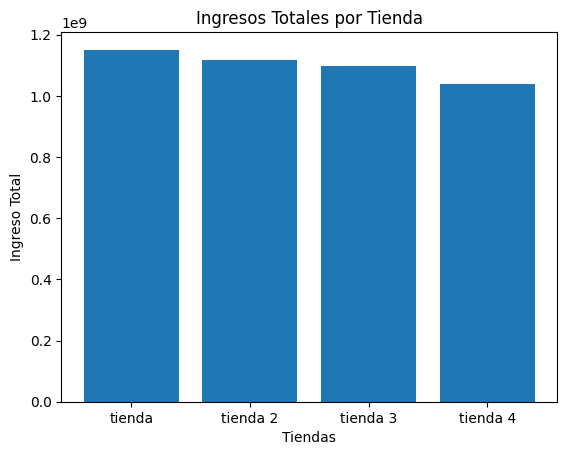

In [104]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(
    ingresos_totales["Tiendas"],
    ingresos_totales["Ingreso Total"]
)

plt.xlabel("Tiendas")
plt.ylabel("Ingreso Total")
plt.title("Ingresos Totales por Tienda")

plt.show()


# 2. Ventas por categoría

In [105]:
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

for nombre, df in tiendas.items():
    print(f"\n📊 {nombre}")
    resultado = (
        df.groupby("Categoría del Producto")
        .size()
        .sort_values(ascending=False)
    )
    print(resultado)



📊 Tienda 1
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
dtype: int64

📊 Tienda 2
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
dtype: int64

📊 Tienda 3
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Artículos para el hogar    177
Instrumentos musicales     177
dtype: int64

📊 Tienda 4
Categoría del Producto
Muebles                    480
Electrónicos               451
Juguetes       

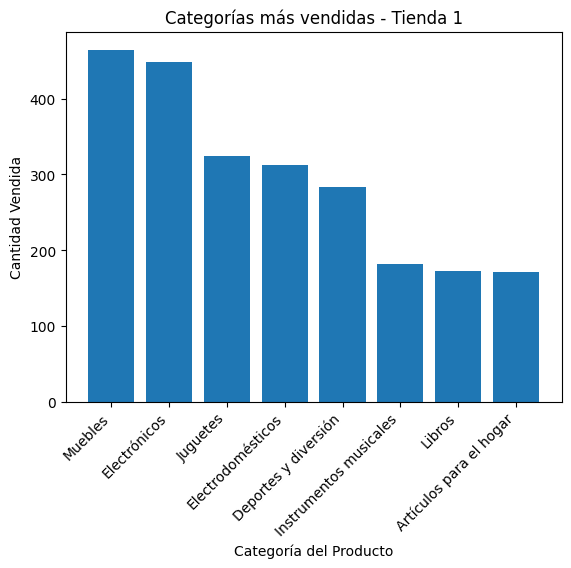

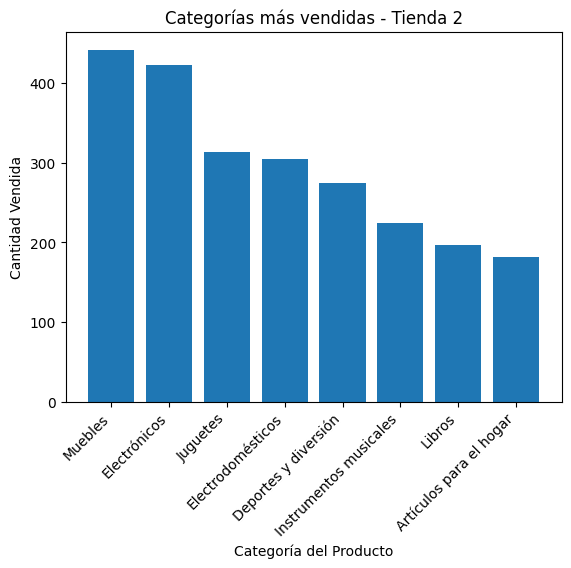

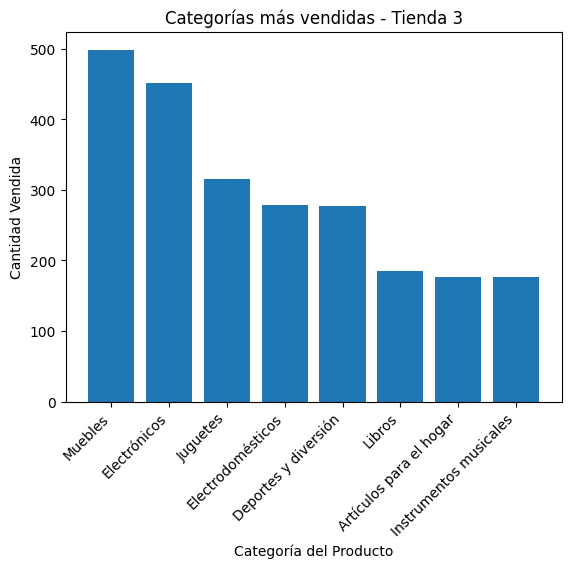

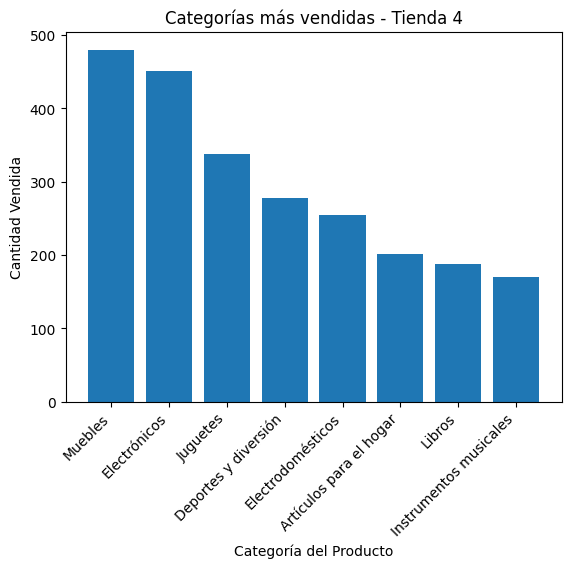

In [106]:
import matplotlib.pyplot as plt

for nombre, df in tiendas.items():

    # Agrupar y contar ventas por categoría
    resultado = (
        df.groupby("Categoría del Producto")
        .size()
        .sort_values(ascending=False)
    )

    # Crear gráfico de barras
    plt.figure()
    plt.bar(resultado.index, resultado.values)
    plt.xlabel("Categoría del Producto")
    plt.ylabel("Cantidad Vendida")
    plt.title(f"Categorías más vendidas - {nombre}")
    plt.xticks(rotation=45, ha="right")

    plt.show()


# 3. Calificación promedio de la tienda


In [107]:
calificacion_tienda1 = tienda['Calificación'].mean()
calificacion_tienda2 = tienda2['Calificación'].mean()
calificacion_tienda3 = tienda3['Calificación'].mean()
calificacion_tienda4 = tienda4['Calificación'].mean()

In [108]:
calificaciones_totales = pd.DataFrame({
    "Tiendas": ["tienda", "tienda 2", "tienda 3", "tienda 4"],
    "Calificacion Total": [
        calificacion_tienda1,
        calificacion_tienda2,
        calificacion_tienda3,
        calificacion_tienda4
    ]
})

print(calificaciones_totales)


    Tiendas  Calificacion Total
0    tienda            3.976685
1  tienda 2            4.037304
2  tienda 3            4.048326
3  tienda 4            3.995759


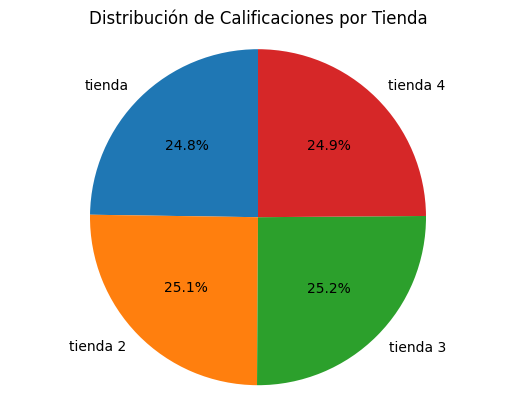

In [109]:
import matplotlib.pyplot as plt

plt.figure()
plt.pie(
    calificaciones_totales["Calificacion Total"],
    labels=calificaciones_totales["Tiendas"],
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Distribución de Calificaciones por Tienda")
plt.axis("equal")

plt.show()


# 4. Productos más y menos vendidos

In [110]:
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

for nombre, df in tiendas.items():
    print(f"\n📊 {nombre}")
    resultado = (
        df.groupby("Producto")
        .size()
        .sort_values(ascending=False)
    )
    print(resultado)



📊 Tienda 1
Producto
Armario                        60
TV LED UHD 4K                  60
Microondas                     60
Secadora de ropa               58
Mesa de noche                  56
Bloques de construcción        56
Balón de baloncesto            55
Bicicleta                      54
Impresora                      54
Vaso térmico                   54
Refrigerador                   54
Batería                        53
Cubertería                     52
Carrito de control remoto      52
Modelado predictivo            51
Auriculares                    50
Ajedrez de madera              49
Iphone 15                      49
Lavavajillas                   48
Guitarra eléctrica             47
Lavadora de ropa               47
Silla de oficina               46
Sofá reclinable                46
Guitarra acústica              46
Estufa                         45
Mesa de centro                 44
Kit de bancas                  44
Cama box                       44
Cubo mágico 8x8            

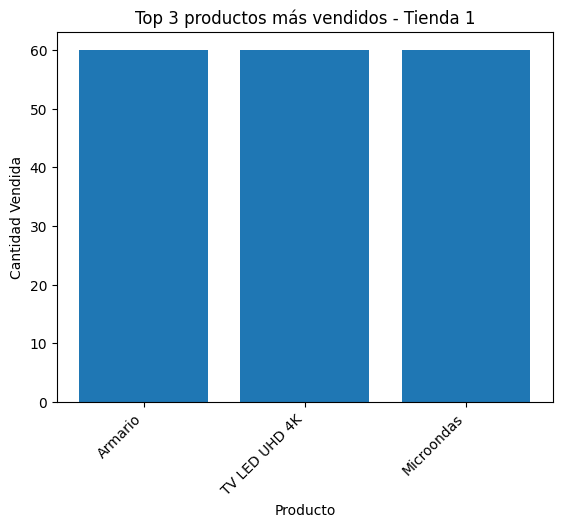

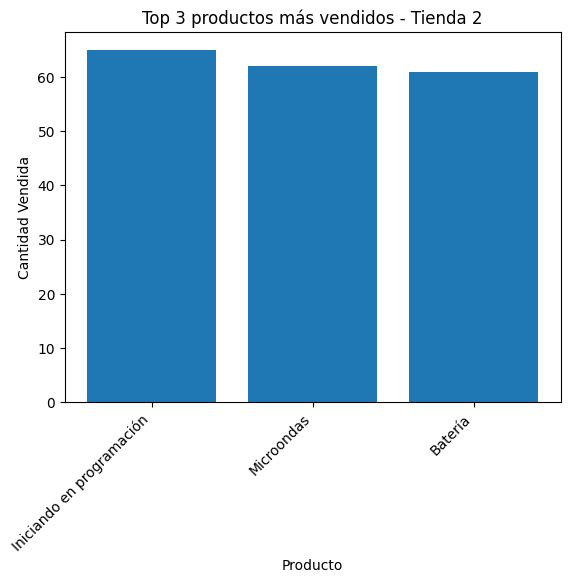

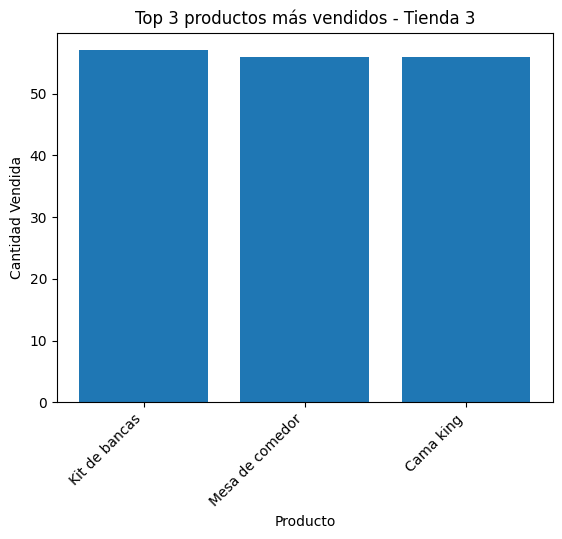

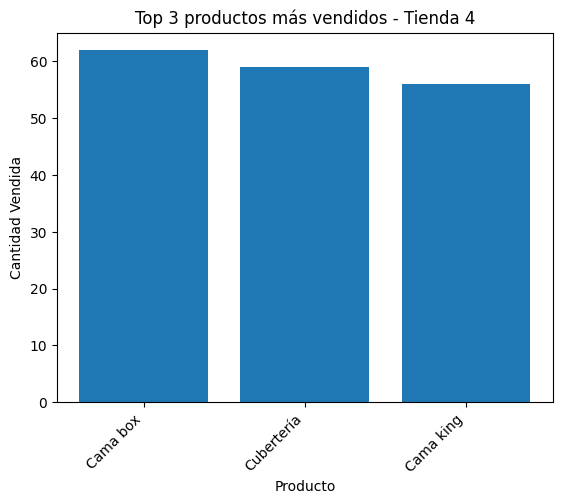

In [111]:
import matplotlib.pyplot as plt

for nombre, df in tiendas.items():

    # Top 3 productos más vendidos por tienda
    top_3 = (
        df.groupby("Producto")
        .size()
        .sort_values(ascending=False)
        .head(3)
    )

    # Crear gráfico
    plt.figure()
    plt.bar(top_3.index, top_3.values)
    plt.xlabel("Producto")
    plt.ylabel("Cantidad Vendida")
    plt.title(f"Top 3 productos más vendidos - {nombre}")
    plt.xticks(rotation=45, ha="right")

    plt.show()


# 5. Envío promedio por tienda

In [112]:
envio_tienda1 = tienda['Costo de envío'].mean()
envio_tienda2 = tienda2['Costo de envío'].mean()
envio_tienda3 = tienda3['Costo de envío'].mean()
envio_tienda4 = tienda4['Costo de envío'].mean()


In [113]:
envios_totales = pd.DataFrame({
    "Tiendas": ["tienda", "tienda 2", "tienda 3", "tienda 4"],
    "Costo Envío Total": [
        envio_tienda1,
        envio_tienda2,
        envio_tienda3,
        envio_tienda4
        ]
})

print(envios_totales)


    Tiendas  Costo Envío Total
0    tienda       26018.609580
1  tienda 2       25216.235693
2  tienda 3       24805.680373
3  tienda 4       23459.457167


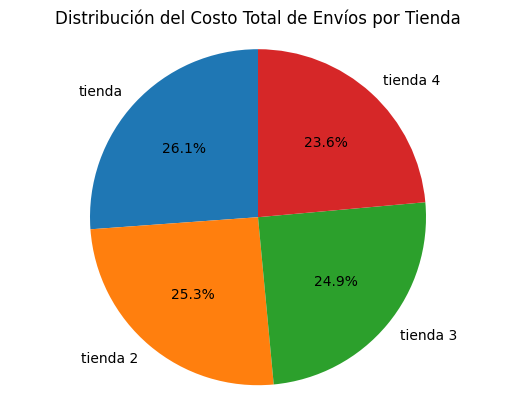

In [114]:
import matplotlib.pyplot as plt

plt.figure()
plt.pie(
    envios_totales["Costo Envío Total"],
    labels=envios_totales["Tiendas"],
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Distribución del Costo Total de Envíos por Tienda")
plt.axis("equal")

plt.show()


#INFORME

## INGRESOS POR TIENDA

En el análisis de los ingresos se observa que las 4 tiendas presentan niveles de ventas elevados y relativamente similares, la diferencia entre la de mayor venta (tienda 1) y la de menor venta (tienda 4) representa menos del 10% del total por lo que no existen grandes brechas con respecto al desempeño financiero.
Sin embargo se observa que la tienda 4 presenta el menor ingreso total posicionándose por debajo del resto.

## VENTAS POR CATEGORÍA

En este item se puede visualizar que existen pequeñas diferencias pero consistentes.

- La tienda 3 lidera en las 2 categorías mas vendidas
- Las tiendas 1 y 2 son estables dentro de todas las categorias
- La tienda 4 es la que menor desempeño tuvo en gran parte de las categorías.

## CALIFICACIÓNES DE LOS CLIENTES

Las 4 tiendas mantienen niveles de satisfacción bastante similares, todas cercanas a 4,0 por lo tanto no existen brechas significativas si hablamos de experiencia del usuario.

## PRODUCTOS MAS Y MENOS VENDIDOS

Aqui se observa que todas las tiendas cuentan con una salida de productos similar, sin productos con desempeño marcadamente bajo.
Tal como lo muestra el análisis la tienda 3 tiene una salida de productos homogénea y equilibrada, a diferencia de la tienda 4 que muestra menor consistencia en productos de mayor valor.

## COSTOS DE ENVÍO
El análisis del costo total de envío muestra que las cuatro tiendas presentan niveles de gasto logístico muy similares, con diferencias menores entre ellas. La Tienda 4 registra el menor costo de envío, mientras que la Tienda 1 presenta el valor más alto, aunque la diferencia entre ambas es reducida.

Estas variaciones no representan una ventaja competitiva significativa para ninguna tienda en particular, por lo que el costo de envío no constituye un factor decisivo de manera individual.


En conclusión la tienda 4 es la mejor candidata para vender, no por fallas graves, sino por ser la menos competitiva en el análisis global.